In [ ]:
# 
import pandas as pd
import numpy as np

# Data Preprocessing

In [3]:
books = pd.read_csv('Books.csv')
books.columns = ['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']
books

ratings_df = pd.read_csv('Ratings.csv')
ratings_df.columns = ['User-Id','ISBN','Book_Rating']

users_df = pd.read_csv('Users.csv')
users_df.columns= ['User-Id','Location','Age'] 

C:\Users\mohammaf\AppData\Local\Temp\ipykernel_21276\3669754017.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [4]:
users_df = users_df.bfill(axis='rows')
users_df = users_df.ffill(axis='rows')
users_df

,User-Id,Location,Age
0,1,"nyc, new york, usa",18.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",17.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",61.0
...,...,...,...
278853,278854,"portland, oregon, usa",50.0
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",50.0
278856,278857,"knoxville, tennessee, usa",50.0


In [5]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [6]:
ratings_df

,User-Id,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [7]:
import matplotlib.pyplot as plt


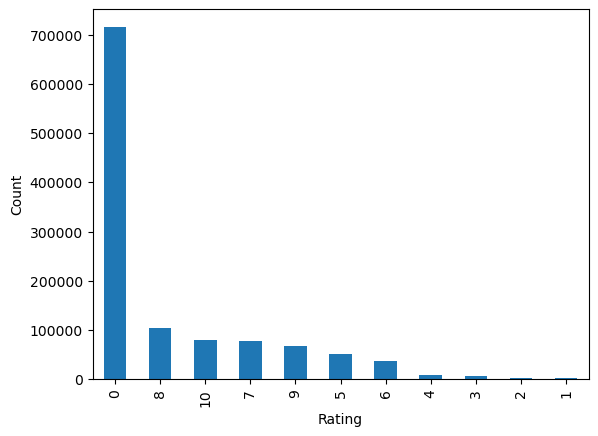

In [8]:
plt.rc("font", size=10)
ratings_df.Book_Rating.value_counts(sort=True).plot(kind='bar')

plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

In [ ]:
ratings_df.Book_Rating.value_counts(sort=True)

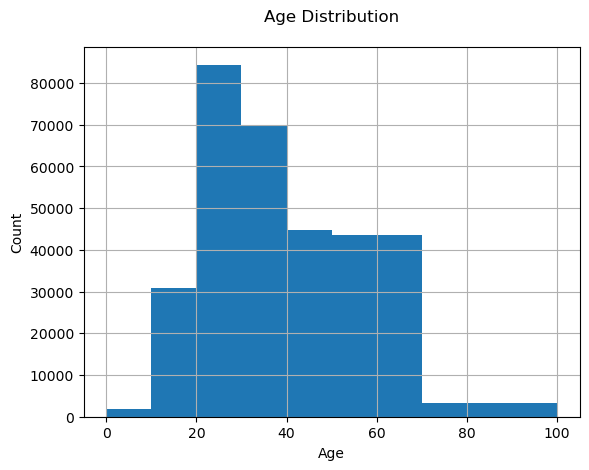

In [9]:
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 70,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
combine_book_rating = pd.merge(ratings_df, books, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating

,User-Id,ISBN,Book_Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel
...,...,...,...,...
196824,276680,086505505X,0,Home Crafts (Historic Communities (Paperback))
196825,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut..."
196826,276680,1582343594,0,City of Masks : A Cree Black Novel
196827,276681,1931333246,10,Chorus


#GROUPING BY TOTAL RATING FOR EACH BOOK

In [12]:

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book_Rating'].
     count().
     reset_index().
     rename(columns = {'Book_Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,totalRatingCount
0,Earth Prayers From around the World: 365 Pray...,10
1,Final Fantasy Anthology: Official Strategy Gu...,4
2,Flight of Fancy: American Heiresses (Zebra Ba...,2
3,Little Comic Shop of Horrors (Give Yourself G...,4
4,Mystery Mile,2


In [13]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-Id,ISBN,Book_Rating,Book-Title,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   68755.000
mean        2.863
std         9.682
min         1.000
25%         1.000
50%         1.000
75%         2.000
max       833.000
Name: totalRatingCount, dtype: float64


In [15]:
#Considering books rated/read by more than 50 people
threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @threshold')
rating_popular_book.dropna()

,User-Id,ISBN,Book_Rating,Book-Title,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60
...,...,...,...,...,...
189364,233776,080411109x,8,The Hundred Secret Senses,233
189365,262281,080411109x,8,The Hundred Secret Senses,233
192093,246507,043935806x,10,Harry Potter and the Order of the Phoenix (Boo...,335
193972,258186,1555049133,0,The Pearl,52


In [16]:
#Scaling the problem to Location = usa/canada
rating_popular_book.fillna(False)
users_df.fillna(False)
combined = pd.merge(rating_popular_book, users_df, how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,User-Id,ISBN,Book_Rating,Book-Title,totalRatingCount,Location
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa"
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa"
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa"
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa"


# MODEL FITTING

This model recommends books by returning most similar list(similarity measure = 'cosine similarity') of books to the given input.

In [17]:
## MODEL FITTING
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-Id', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title', columns = 'User-Id', values = 'Book_Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
## OUTPUTS A RANDOM BOOKID
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

159


In [26]:
us_canada_user_rating_pivot.index[query_index]

'STONES FROM THE RIVER'

In [23]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Alias Grace:

1: Rubyfruit Jungle, with distance of 0.909821470186623:
2: The Stone Diaries, with distance of 0.9115646741921223:
3: Split Second (Maggie O'Dell Novels (Paperback)), with distance of 1.0:
4: Stargirl, with distance of 1.0:
5: Strange Fits of Passion: A Novel, with distance of 1.0:


In [29]:
#### FOR MANUAL ENTRY OF BOOK NAME 
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format('16 Lighthouse Road'))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 16 Lighthouse Road:

1: One True Thing, with distance of 0.9031526085278189:
2: Tears of the Giraffe (No.1 Ladies Detective Agency), with distance of 0.9329869925143714:
3: The Art of Happiness: A Handbook for Living, with distance of 0.9375127606969624:
4: The Hundred Secret Senses, with distance of 0.9431448277136437:
5: Angela's Ashes: A Memoir, with distance of 0.9440402066573865:
